## Steal hits

Get all ligands in PDB

In [1]:
from pathlib import Path

reference_path = Path('XX01ZVNS2B') /  'reference.pdb'
target_name = 'XX01ZVNS2B'

In [4]:
import pymol2

with pymol2.PyMOL() as pymol:
    pymol.cmd.load(reference_path)
    fasta: str = pymol.cmd.get_fastastr('reference')
    assert fasta.count('>') == 1, 'There are multiple sequences'
    seq: str = ''.join(fasta.split('\n')[1:])

print(len(seq), set(seq))

AssertionError: There are multiple sequences

In [3]:
fasta

'>reference_A\nDMYIERAGDITWEKDAEVTGNSPRLDVALDESGDFSLVE\n>reference_B\nGETTDGVYRVMTRRLLGSTQVGVGVMQEGVFHTMWHVTKGAALRSGEGRLDPYWGDVKQDLVSYCGPWKL\nDAAWDGLSEVQLLAVPPGERAKNIQTLPGIFKTKDGDIGAVALDYPAGTSGSPILDKCGRVIGLYGNGVV\nIKNGSYVSAITQGKRE\n'

In [5]:
seq = 'GETTDGVYRVMTRRLLGSTQVGVGVMQEGVFHTMWHVTKGAALRSGEGRLDPYWGDVKQDLVSYCGPWKL\nDAAWDGLSEVQLLAVPPGERAKNIQTLPGIFKTKDGDIGAVALDYPAGTSGSPILDKCGRVIGLYGNGVV\nIKNGSYVSAITQGKRE'

In [6]:
#@title Find related structures in the PDB
import pyrosetta_help as ph

acceptor_chain = 'B'

print('blasting sequence...')
hunter = ph.LigandHunter(seq)
print('Most common ligands:')
for lig, c in hunter.get_most_common_ligands()[:10]:
    print(lig, c, hunter.ligand_data[lig][0]['name'])
df = hunter.to_dataframe()
df.to_csv('blast_hits.csv')
df

/Users/user/.conda/envs/py310/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


blasting sequence...


/Users/user/.conda/envs/py310/lib/python3.10/site-packages/Bio/SearchIO/_legacy/__init__.py:12: BiopythonDeprecationWarning: The 'Bio.SearchIO._legacy' module for parsing BLAST plain text output is deprecated and will be removed in a future release of Biopython. Consider generating your BLAST output for parsing as XML or tabular format instead.
  warnings.warn(


Most common ligands:
GOL 25 GLYCEROL
CL 10 CHLORIDE ION
ZN 7 ZINC ION
SO4 6 SULFATE ION
BEZ 4 BENZOIC ACID
EDO 4 1,2-ETHANEDIOL
NI 4 NICKEL (II) ION
6T8 2 N-((S)-3-(4-(aminomethyl)phenyl)-1-(((R)-4-guanidino-1-(5-hydroxy-1,3,2-dioxaborinan-2-yl)butyl)amino)-1-oxopropan-2-yl)benzamide
NKK 2 N~2~-(naphthalen-2-ylcarbonyl)-L-lysyl-N-[(1S)-4-carbamimidamido-1-formylbutyl]-L-lysinamide
CD 2 CADMIUM ION


,accession,description,evalue,pdb_code,chain,ligands,ligand_codes,cofactor_codes,has_cofactor
7DOC,7DOC_D,"Chain D, Core protein [Zika virus]",0.0,7DOC,D,[],[],[],False
5GJ4,5GJ4_B,"Chain B, Serine protease NS3 [Zika virus]",0.0,5GJ4,B,"[{'chain_id': 'B', 'author_residue_number': 20...","[CL, CL]",[],False
5GPI,5GPI_B,"Chain B, NS3 protease [Zika virus]",0.0,5GPI,B,[],[],[],False
6L4Z,6L4Z_F,"Chain F, Genome polyprotein [Zika virus]",0.0,6L4Z,F,"[{'chain_id': 'H', 'author_residue_number': 20...",[E5X],[],False
5H6V,5H6V_B,"Chain B, Genome polyprotein [Zika virus]",0.0,5H6V,B,"[{'chain_id': 'B', 'author_residue_number': 20...",[7HS],[],False
6KK3,6KK3_B,"Chain B, Genome polyprotein [Zika virus]",0.0,6KK3,B,"[{'chain_id': 'B', 'author_residue_number': 20...",[DUU],[],False
7VXX,7VXX_B,"Chain B, Serine protease NS3 [Zika virus]",0.0,7VXX,B,"[{'chain_id': 'D', 'author_residue_number': 20...",[PBZ],[],False
5YOD,5YOD_B,"Chain B, NS3 protease [Zika virus]",0.0,5YOD,B,"[{'chain_id': 'B', 'author_residue_number': 20...","[BEZ, BEZ, BEZ, BEZ]",[],False
5T1V,5T1V_A,"Chain A, NS2B-NS3 protease,NS2B-NS3 protease [...",0.0,5T1V,A,[],[],[],False
5TFO,5TFO_A,"Chain A, NS2B-NS3 Protease CHIMERA,NS2B-NS3 PR...",0.0,5TFO,A,[],[],[],False


In [11]:
import chempy
from typing import List, Set, Dict
fluff_marker = '_'  # name + fluff + index, say MPRO-x0102_0B§1
from collections import defaultdict

pdb_blocks: Dict[str, str] = {}
details: Dict[str, Dict] = {}
chemcomp_tally = defaultdict(int)
with pymol2.PyMOL() as pymol:
    pymol.cmd.set('pdb_conect_all', 'on')
    pymol.cmd.load(reference_path)
    for i, row in df.iterrows():
        if len(row.ligand_codes) == 0:
            continue
        pymol.cmd.fetch(row.pdb_code)
        pymol_name = row.pdb_code
        xstal_name = row.pdb_code
        pymol.cmd.align(f'%{row.pdb_code} and chain {row.chain}', 'reference')
        for lig_resn in set(row.ligand_codes):
            # ## Determine what is unique ligand residue
            # get atoms of ligand
            lig_atoms: List[chempy.Atom] = pymol.cmd.get_model(f'%{pymol_name} and resn {lig_resn}').atom
            # get set of tuple of resi chain segi alt
            selectors: Set[tuple] = {(atom.resi, atom.chain, atom.segi, atom.alt) for atom in lig_atoms}
            # iterate for all unique
            for resi, chain, segi, alt in selectors:
                sele = f'%{pymol_name} and resn {lig_resn} and resi {resi}'
                if chain:
                    sele+= f' and chain {chain}'
                if segi:
                    sele+= f' and segi {segi}'
                if alt:
                    sele+= f' and alt {alt}'
                # MOD: no asymmetric chain business here: too dangerous
                xsele = f'(not ({sele})) and bound_to ({sele})'
                covalency = False
                if pymol.cmd.count_atoms(xsele):
                    # crosslink
                    covalency = True
                    pymol.cmd.alter(xsele, 'elem="T"')  # Chem.MolFromPDBBlock does not like *, R, X
                    pymol.cmd.alter(xsele, 'name = " X  "')
                    pymol.cmd.sort()
                pymol.cmd.create('copied', f'bound_to ({sele})')
                pymol.cmd.alter('%copied', 'alt=""')
                pymol.cmd.alter('%copied', 'segi=""')
                pymol.cmd.alter('%copied', 'chain="X"')
                pymol.cmd.alter('%copied', 'resi="1"')
                pymol.cmd.alter('%copied', f'resn="LIG"')
                pymol.cmd.sort()
                # MOD
                #neoname = f'{xstal_name}{fluff_marker}{i}'
                chemcomp_tally[lig_resn] += 1
                neoname = f'{lig_resn}{fluff_marker}{chemcomp_tally[lig_resn]}'
                pdb_blocks[neoname] = pymol.cmd.get_pdbstr('%copied').replace('ATOM  ', 'HETATM')
                pymol.cmd.delete('copied')
                details[neoname] = {**row.to_dict(),  # mod
                                    'covalent': covalency,
                                    **dict(base_name=xstal_name,
                                        lig_resn=lig_resn,
                                         lig_resi=resi,
                                         lig_chain=chain,
                                         lig_segi=segi,
                                         lig_alt=alt,
                                         polymer_chain='A',)  # mod
                                    }


 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF
 ExecutiveLoad-Detail: Detected mmCIF


In [13]:
smilesdex = {detail['lig_resn']: ph.get_smiles(detail['lig_resn']) for detail in details.values() if detail['lig_resn'] != 'LIG' and detail['lig_resn'] != 'UNL' and detail['lig_resn'] is not None}

In [74]:
smilesdex['6T8'] = smilesdex['6T8'].replace('B', '[B+](*)')

In [79]:
for detail in details.values():
    detail['single_smiles'] = smilesdex.get(detail['lig_resn'], None)

In [80]:
import json
import pickle
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

smiles_col_name = 'single_smiles'

mols = []
baddies = []
inorganics = []
broken = []
for name, block in pdb_blocks.items():
    if block.strip().count('\n') == 0:
        print(f'No atoms in {name}')
        broken.append(name)
        continue
    detail: dict = details[name]
    mol = Chem.MolFromPDBBlock(block, proximityBonding='CONECT' not in block)
    if mol is None:
        print(f'Issue with sanitisation, trying without for {name}')
        mol = Chem.MolFromPDBBlock(block, proximityBonding='CONECT' not in block, sanitize=False)
    if len(mol.GetAtomsMatchingQuery(AllChem.AtomNumEqualsQueryAtom(6))) == 0:
        print(f'No carbon atoms in {name}')
        inorganics.append(name)
        continue
    tritium = mol.GetAtomsMatchingQuery(AllChem.IsotopeEqualsQueryAtom(3))
    for atom in tritium:  #: Chem.Atom
        atom.SetIsotope(0)
        atom.SetAtomicNum(0)  # dummy atom is zahl zero
    assert mol, f'{name} failed to load'
    # MOD
    #assert mol.GetNumAtoms() > 0 and mol.GetNumBonds() > 0, f'{name} failed to load'
    assert mol.GetNumAtoms() > 0, f'{name} failed to load'
    smiles = detail[smiles_col_name]
    if smiles is None:
        smiles=''
    ref = Chem.MolFromSmiles(smiles)
    try:
        mol = AllChem.AssignBondOrdersFromTemplate(ref, mol)
    except Exception as e:
        print(f'Issue with bond orders for {name} - {e.__class__.__name__}{e}')
        baddies.append(dict(name=name, block=block, mol=mol, ref=ref, detail=detail, exception=e))
        # continue # MOD: These are PDB depositions they have bond order.
    mol.SetProp('XChem_code', name.split('_')[0])
    mol.SetProp('Occupancy', json.dumps([a.GetPDBResidueInfo().GetOccupancy() for a in mol.GetAtoms()]) )
    mol.SetProp('TempFactor', json.dumps([a.GetPDBResidueInfo().GetTempFactor() for a in mol.GetAtoms()]) )
    unprefixed = name.replace(target_name + '-', '')
    mol.SetProp('_Name', unprefixed)
    for k, v in detail.items():
        if isinstance(v, dict):
            v = json.dumps(v)
        mol.SetProp(k, str(v))
    for atom in mol.GetAtoms():
        name = atom.GetPDBResidueInfo().GetName()
        atom.SetProp('molFileAlias', name)
    mols.append(mol)

assert mols, 'No mols!'

No atoms in CL_1
No atoms in CL_2
No carbon atoms in DUU_1
No carbon atoms in DUU_2
Issue with sanitisation, trying without for DUU_3
Issue with bond orders for DUU_3 - ValueErrorNo matching found
Issue with bond orders for BEZ_1 - ValueErrorNo matching found
Issue with bond orders for BEZ_2 - ValueErrorNo matching found
Issue with bond orders for BEZ_3 - ValueErrorNo matching found
Issue with bond orders for BEZ_4 - ValueErrorNo matching found
Issue with sanitisation, trying without for 6T8_1
Issue with bond orders for 6T8_1 - ArgumentErrorPython argument types in
    Mol.__init__(Mol, NoneType)
did not match C++ signature:
    __init__(_object*, RDKit::ROMol mol, bool quickCopy=False, int confId=-1)
    __init__(_object*, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>> pklString, unsigned int propertyFlags)
    __init__(_object*, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>> pklString)
    __init__(_object*)


[13:12:51] WARNING: More than one matching pattern found - picking one

[13:12:51] WARNING: More than one matching pattern found - picking one

[13:12:51] WARNING: not removing hydrogen atom without neighbors
[13:12:51] WARNING: not removing hydrogen atom without neighbors
[13:12:51] Explicit valence for atom # 46 H, 3, is greater than permitted
[13:12:51] WARNING: More than one matching pattern found - picking one

[13:12:51] Explicit valence for atom # 37 B, 4, is greater than permitted
[13:12:51] Explicit valence for atom # 28 B, 5, is greater than permitted
[13:12:51] Explicit valence for atom # 37 B, 4, is greater than permitted
[13:12:51] Explicit valence for atom # 28 B, 5, is greater than permitted
[13:12:51] WARNING: More than one matching pattern found - picking one

[13:12:51] WARNING: More than one matching pattern found - picking one

[13:12:51] WARNING: More than one matching pattern found - picking one

[13:12:51] WARNING: More than one matching pattern found - picking o

In [81]:
from rdkit.Chem import Draw
from typing import List
from IPython.display import Image

def flatgrid(mols, *args, **kwargs) -> Image:
    # from https://www.blopig.com/blog/2023/06/customising-mcs-mapping-in-rdkit/
    copies: List[Chem.Mol] = [Chem.Mol(m) for m in mols]
    *map(AllChem.Compute2DCoords, copies),   # noqa, it's in place
    if 'legends' not in kwargs:
        kwargs['legends'] = [m.GetProp('_Name') if m.HasProp('_Name') else '-' for m in mols]
    return Draw.MolsToGridImage(copies, *args, **kwargs)

import os
import importlib.util
from types import ModuleType

def import_path(module_path, module_name='custom_module') -> ModuleType:
    spec = importlib.util.spec_from_file_location(module_name, module_path)
    mod = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(mod)
    return mod

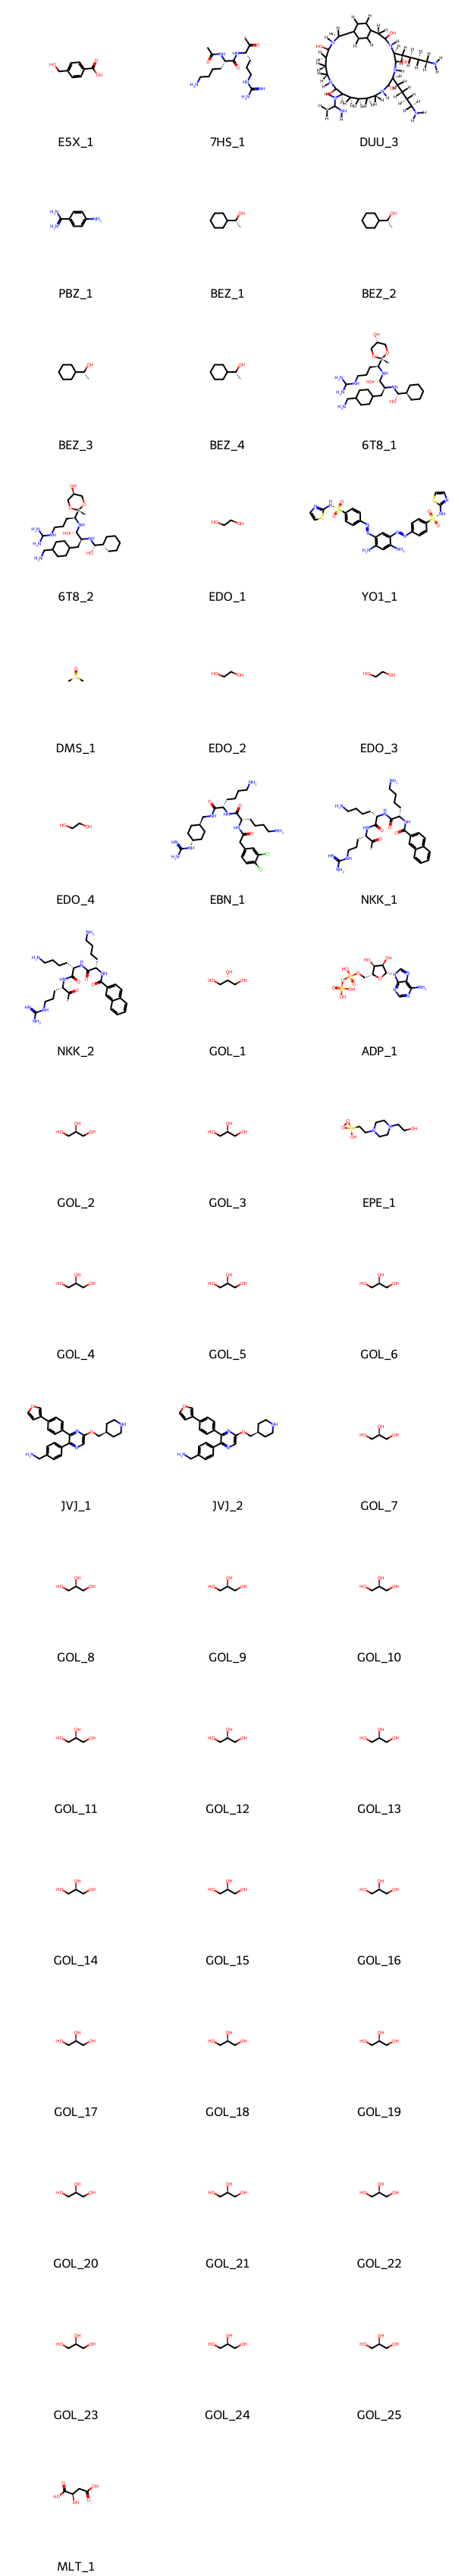

In [82]:
flatgrid(mols)

In [24]:
module_path = (Path.home() / 'Coding' / 'Fragment-hit-follow-chemistry' / 'followup' / 'prep_fragalysis.py')
prep_module = import_path(module_path)
header = prep_module.generate_header(method=target_name +'_stolen-hits',
                         ref_url='https://github.com/matteoferla/Fragment-hit-follow-up-chemistry',
                         submitter_name='Matteo',
                         submitter_email='matteo.ferla@stats.ox.ac.uk',
                         submitter_institution='Oxford',
                         generation_date='2023-7-18',
                         smiles='CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
                         extras={'pdb_code': 'PDB code', 'description': 'PDB description'})

[11:59:27] Molecule does not have explicit Hs. Consider calling AddHs()


In [65]:
from rdkit_to_params import DummyMasker

with Chem.SDWriter('stolen.sdf') as writer:
    writer.write(header)
    writer.SetProps(['pdb_code', 'description', 'ref_pdb', 'ref_mols', 'original SMILES'])
    for mol in mols:
        mol.SetProp('ref_pdb', 'x0404_0B')
        mol.SetProp('ref_mols', 'x0404_0B')  # prop format
        
        mask.mol.SetProp('original SMILES', Chem.MolToSmiles(mask.mol))
        with DummyMasker(mol, placekeeper_zahl=16) as mask:  # Sulfur is 16. Xenon is 54
            try:
                AllChem.SanitizeMol(mask.mol)
                mask.mol.SetProp('original SMILES', Chem.MolToSmiles(mask.mol))
                writer.write(mask.mol)
            except Exception as error:
                print(mol.GetProp('_Name'), error.__class__.__name__, str(error))

6T8_1 AtomValenceException Explicit valence for atom # 37 B, 4, is greater than permitted
6T8_2 AtomValenceException Explicit valence for atom # 37 B, 4, is greater than permitted


[12:37:31] WARNING: Setting property list after a few molecules have been written
[12:37:31] Explicit valence for atom # 37 B, 4, is greater than permitted
[12:37:31] Explicit valence for atom # 37 B, 4, is greater than permitted


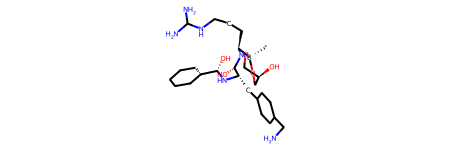

In [67]:
mols[9]

NCc1ccc(C[C@H](NC(=O)c2ccccc2)C(=O)N[C@@H](CCCNC(N)=N)B3OCC(O)CO3)cc1


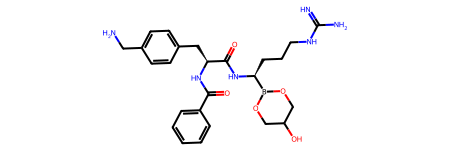

In [72]:
print(smilesdex['6T8'])
Chem.MolFromSmiles(smilesdex['6T8'])

In [73]:
smilesdex['6T8'] = smilesdex['6T8'].replace('B', '[B+](*)')